# Kazarlis 10 Generator Problem

This notebook runs the GA on the 10 generator problem and demand profile given in the original paper by Kazarlis et al. 1996. 

The original Kazarlis problem showed training for 500 generations, achieving a minimum operating cost of $\$$562825. The maximum cost over 20 runs was $\$$570032 dollars. Each generation has a population of 50 genotypes.

## Imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from genetic_algorithm import run_genetic_algorithm
from economic_dispatch import economic_dispatch
from helpers import convert_to_integer
from fitness import calculate_constraint_costs

## Read demand and generator info

In [10]:
# Change demand profile here
demand = np.genfromtxt('data/kazarlis_demand.txt')

# Change gen_info here
gen_info = pd.read_csv('data/kazarlis_units.csv')

## Input GA parameters

In [11]:
# Supply the kwargs
all_kwargs = {'demand': demand,
              'gen_info': gen_info,
              'init_status': gen_info['status'],
              'voll': 1e3,
              'constraint_penalty': 1e4,
              'reserve_margin': 0.1,
              'mutation_probability': 0.01,
              'crossover_probability': 0.5,
              'swap_window_probability': 0.3,
              'window_mutation_probability': 0.3,
              'swap_window_hc_probability': 0.3,
              'pop_size': 50,
              'max_penalty': 1e4}

# Set the number of generations
number_of_generations = 500

## Create a random schedule to initialise the GA

In [12]:
# Number of generators and periods
num_gen = gen_info.shape[0]
T = demand.size

# Get a random schedule to begin with
random_schedule = np.random.choice(2, size = (T, num_gen))
init_status = all_kwargs.get('init_status')
seed_schedule = convert_to_integer(random_schedule, init_status)

## Run the GA

In [13]:
# Run GA
best_genotype, results = run_genetic_algorithm(number_of_generations, seed_schedule, **all_kwargs)

Best fitness at iteration 0: 5210578.826120999
Best fitness at iteration 1: 4096133.0267609837
Best fitness at iteration 2: 2516092.664210596
Best fitness at iteration 3: 1757000.7412716534
Best fitness at iteration 4: 1428935.0613195768
Best fitness at iteration 5: 1041937.402292303
Best fitness at iteration 6: 920450.1877094436
Best fitness at iteration 7: 681779.0025230763
Best fitness at iteration 8: 660771.0674805182
Best fitness at iteration 9: 653296.4010861052
Best fitness at iteration 10: 650773.8759911207
Best fitness at iteration 11: 647159.8618090124
Best fitness at iteration 12: 638675.7937982774
Best fitness at iteration 13: 636638.7980804641
Best fitness at iteration 14: 629522.8455740975
Best fitness at iteration 15: 626035.7644075168
Best fitness at iteration 16: 624356.2905292073
Best fitness at iteration 17: 623238.9411599269
Best fitness at iteration 18: 620140.4677925797
Best fitness at iteration 19: 611628.0613886875
Best fitness at iteration 20: 606123.1666509573

Best fitness at iteration 170: 591068.7136853465
Best fitness at iteration 171: 591148.7136853465
Best fitness at iteration 172: 591228.7136853465
Best fitness at iteration 173: 591308.7136853465
Best fitness at iteration 174: 591021.2808085333
Best fitness at iteration 175: 589248.9090571171
Best fitness at iteration 176: 588641.6332471889
Best fitness at iteration 177: 588701.6332471889
Best fitness at iteration 178: 588761.6332471889
Best fitness at iteration 179: 588821.6332471889
Best fitness at iteration 180: 588881.6332471889
Best fitness at iteration 181: 588941.6332471889
Best fitness at iteration 182: 589001.6332471889
Best fitness at iteration 183: 589061.6332471889
Best fitness at iteration 184: 589121.6332471889
Best fitness at iteration 185: 589181.6332471889
Best fitness at iteration 186: 589163.3242471887
Best fitness at iteration 187: 589223.3242471887
Best fitness at iteration 188: 589283.3242471887
Best fitness at iteration 189: 589343.3242471887
Best fitness at iter

Best fitness at iteration 338: 591646.247423157
Best fitness at iteration 339: 591686.247423157
Best fitness at iteration 340: 591726.247423157
Best fitness at iteration 341: 591766.247423157
Best fitness at iteration 342: 591806.247423157
Best fitness at iteration 343: 591846.247423157
Best fitness at iteration 344: 591886.247423157
Best fitness at iteration 345: 591926.247423157
Best fitness at iteration 346: 591915.0704139309
Best fitness at iteration 347: 591955.0704139309
Best fitness at iteration 348: 591995.0704139309
Best fitness at iteration 349: 592035.0704139309
Best fitness at iteration 350: 592075.0704139309
Best fitness at iteration 351: 592115.0704139309
Best fitness at iteration 352: 592155.0704139309
Best fitness at iteration 353: 592195.0704139309
Best fitness at iteration 354: 592235.0704139309
Best fitness at iteration 355: 592275.0704139309
Best fitness at iteration 356: 592315.0704139309
Best fitness at iteration 357: 592355.0704139309
Best fitness at iteration 35

## Plot the dispatch

We plot the dispatch of the final solution. 

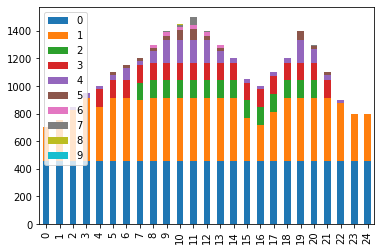

In [18]:
# Calculate ED for the best schedule
ed = economic_dispatch(gen_info, best_genotype.schedule, demand)

# Plot schedule data frame 
df = pd.DataFrame(ed[0])
df.plot(kind='bar', stacked=True)
plt.show()

## Fitness improvement

The improvement in fitness during the GA is plotted below

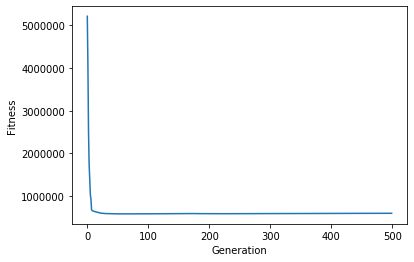

In [22]:
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(number_of_generations), results)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")
plt.show()

## Check constraint violations 

In [26]:
# Are constraints violated?
gen_info = all_kwargs.get('gen_info')
init_status = all_kwargs.get('init_status')
penalty = all_kwargs.get('constraint_penalty')
demand = all_kwargs.get('demand')
reserve_margin = all_kwargs.get('reserve_margin')

constraint_costs = calculate_constraint_costs(best_genotype.schedule, gen_info, init_status, penalty, demand, reserve_margin)
print("Constraint costs: {}".format(np.sum(constraint_costs)))

Constraint costs: 20000.0
